# ARMA Models in StatsModels - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using StatsModels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

data = pd.read_csv("winning_400m.csv")
data["year"] = pd.to_datetime(data["year"].astype(str))
data.set_index("year", inplace=True)
data.index = data.index.to_period("Y")

In [5]:
# Preview the dataset
data

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6
1924,47.6
1928,47.8
1932,46.2
1936,46.5


Plot this time series data. 

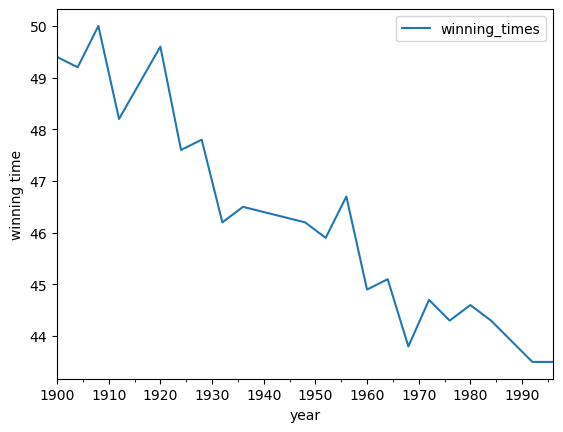

In [7]:
# Plot the time series
data.plot(ylabel="winning time");

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [12]:
# Difference the time series
data_diff = data.diff(periods=1)
data_diff.dropna(inplace=True)
data_diff

,winning_times
year,
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4
1924,-2.0
1928,0.2
1932,-1.6
1936,0.3
1948,-0.3


Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

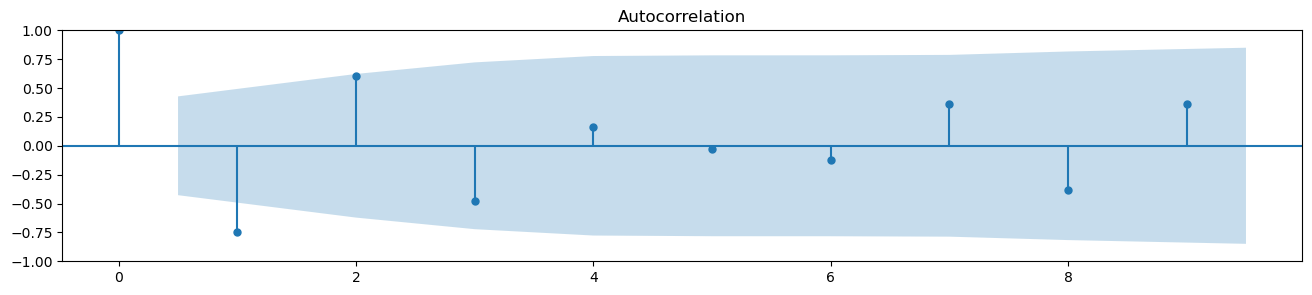

In [28]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(16,3))
plot_acf(data_diff, ax=ax, lags=9);

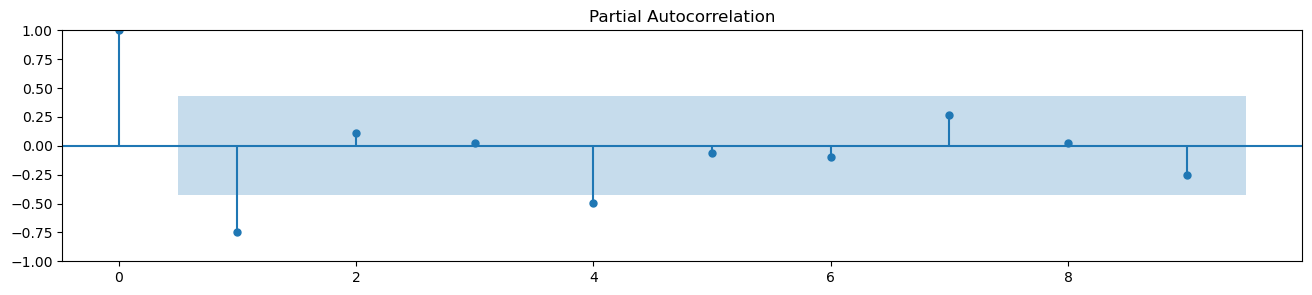

In [27]:
# Plot the PACF
fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(data_diff, ax=ax, lags=9);

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [29]:
from statsmodels.tsa.arima.model import ARIMA

mod_arma = ARIMA(data_diff, order=(1, 0, 0))
res_arma = mod_arma.fit()
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -20.054
Date:                Mon, 08 Jul 2024   AIC                             46.107
Time:                        20:38:59   BIC                             49.241
Sample:                    12-31-1904   HQIC                            46.787
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2885      0.081     -3.559      0.000      -0.447      -0.130
ar.L1         -0.7186      0.144     -5.005      0.000      -1.000      -0.437
sigma2         0.3819      0.180      2.121      0.0

In [30]:
mod_arma = ARIMA(data_diff, order=(0, 0, 1))
res_arma = mod_arma.fit()
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 -22.443
Date:                Mon, 08 Jul 2024   AIC                             50.885
Time:                        20:39:33   BIC                             54.019
Sample:                    12-31-1904   HQIC                            51.565
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3053      0.059     -5.201      0.000      -0.420      -0.190
ma.L1         -0.7390      0.282     -2.620      0.009      -1.292      -0.186
sigma2         0.4780      0.214      2.232      0.0

In [34]:
mod_arma = ARIMA(data_diff, order=(2, 0, 0))
res_arma = mod_arma.fit()
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 -19.931
Date:                Mon, 08 Jul 2024   AIC                             47.863
Time:                        20:45:52   BIC                             52.041
Sample:                    12-31-1904   HQIC                            48.770
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2835      0.090     -3.152      0.002      -0.460      -0.107
ar.L1         -0.6307      0.208     -3.031      0.002      -1.039      -0.223
ar.L2          0.1133      0.212      0.534      0.5

## What is your final model? Why did you pick this model?

In [ ]:
# ARMA model(1,0) scores best on both AIC and BIC by a slight margin. All models
# have statistically significant co-efficients. It is selected as the best model

### Model 1: ARIMA(1, 0)

- **Log Likelihood**: -20.054
- **AIC (Akaike Information Criterion)**: 46.107
- **BIC (Bayesian Information Criterion)**: 49.241
- **Parameters**:
  - AR(1): Coefficient -0.7186 (significant)
  - Constant: -0.2885 (significant)
  - Variance (sigma2): 0.3819

### Model 2: ARMA(0, 1)

- **Log Likelihood**: -22.443
- **AIC (Akaike Information Criterion)**: 50.885
- **BIC (Bayesian Information Criterion)**: 54.019
- **Parameters**:
  - MA(1): Coefficient -0.7390 (significant)
  - Constant: -0.3053 (significant)
  - Variance (sigma2): 0.4780

### Evaluation

**Log Likelihood**: Model 1 (-20.054) has a slightly higher log likelihood compared to Model 2 (-22.443), indicating Model 1 fits the data marginally better

- **AIC and BIC**: Model 1 has lower AIC (46.107) and BIC (49.241) compared to Model 2 (AIC 50.885, BIC 54.019). Lower AIC and BIC values indicate that Model 1 is favored in terms of goodness of fit and model simplicity

- **Parameters**: Both models have significant parameters

- **Diagnostic Tests**: Model 2 shows slightly better results in terms of heteroskedasticity and skewness.

### Conclusion:

Based on the evaluation of log likelihood, AIC, BIC, and parameter significance, **Model 1 (ARIMA(1, 0, 0))** appears to be the preferred choice. It has a better AIC and BIC, indicating a better trade-off between goodness of fit and model complexity. Additionally, both AR(1) and constant terms are significant in Model 1.

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 